<a href="https://colab.research.google.com/github/RYUKxAYU/internship_Assisment_1/blob/main/cognifyz_Intern_assisment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
import numpy as np
print("Done??")

Done??


In [ ]:
import pandas as pd

file_path = "/content/Dataset .csv"
df = pd.read_csv(file_path)
df_info = df.info()
df_head = df.head()
df_info, df_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

(None,
    Restaurant ID         Restaurant Name  ...  Rating text Votes
 0        6317637        Le Petit Souffle  ...    Excellent   314
 1        6304287        Izakaya Kikufuji  ...    Excellent   591
 2        6300002  Heat - Edsa Shangri-La  ...    Very Good   270
 3        6318506                    Ooma  ...    Excellent   365
 4        6314302             Sambo Kojin  ...    Excellent   229
 
 [5 rows x 21 columns])

In [ ]:
columns_drop=['Restaurant ID', 'Restaurant Name', 'Address', 'Locality', 'Locality Verbose']
df_model=df.drop(columns=columns_drop)

In [ ]:
imputer=SimpleImputer(strategy='most_frequent')
df_model= pd.DataFrame(imputer.fit_transform(df_model), columns=df_model.columns)

In [ ]:
lable_encoders={}
for column in df_model.select_dtypes(include='object').columns:
  lable= LabelEncoder()
  df_model[column]= lable.fit_transform(df_model[column])
  lable_encoders[column]=lable


In [ ]:
X=df_model.drop('Aggregate rating', axis=1)
Y=df_model['Aggregate rating'].astype(float)

In [ ]:
X_train, X_test,Y_train, Y_test= train_test_split(X,Y, test_size=0.2, random_state=42)

model= RandomForestRegressor(random_state=42)
model.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

In [ ]:
Y_pred= model.predict(Xtest)
mse= mean_squared_error(Y_test, Y_pred)
r2=r2_score(Y_test,Y_pred)

In [ ]:
feature_importance=pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
mse, r2, feature_importance.head(20)

(2.923048927263213,
 0.9613462264650443,
 Votes                   0.698825
 Rating color            0.245442
 Rating text             0.023608
 Latitude                0.008719
 Longitude               0.008521
 Cuisines                0.006973
 Average Cost for two    0.004691
 Has Online delivery     0.001059
 City                    0.000917
 Price range             0.000672
 Has Table booking       0.000337
 Currency                0.000087
 Is delivering now       0.000084
 Country Code            0.000065
 Switch to order menu    0.000000
 dtype: float64)

<ipython-input-31-1e862ae9b8ed>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance.head(10), y=feature_importance.head(10).index, palette="viridis")


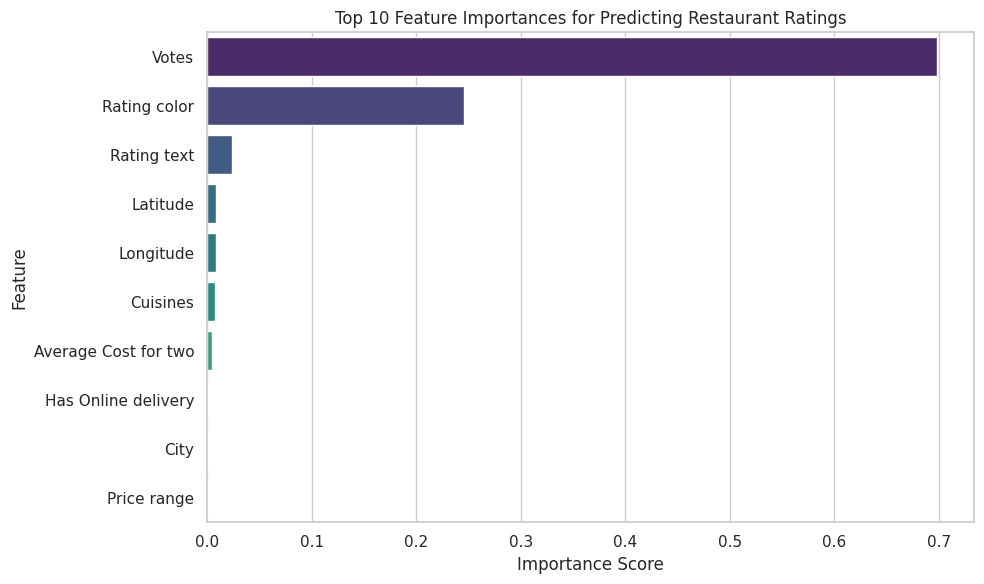

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.head(10), y=feature_importance.head(10).index, palette="viridis")
plt.title("Top 10 Feature Importances for Predicting Restaurant Ratings")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

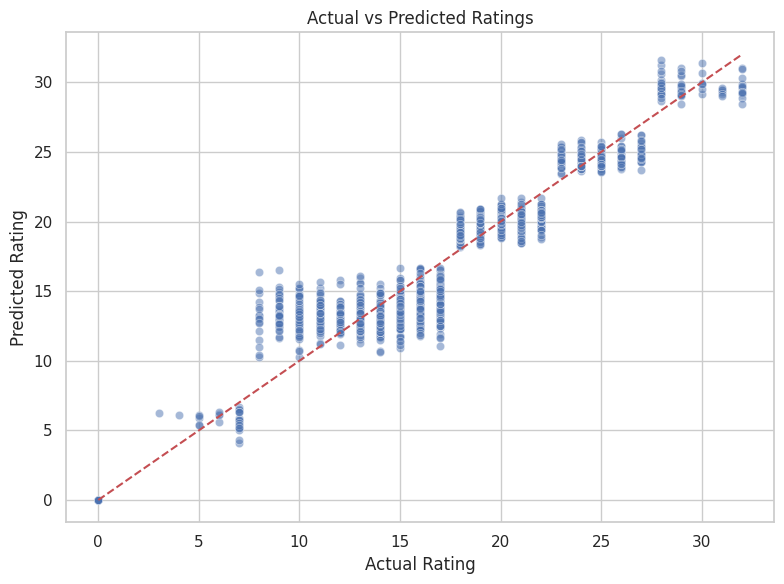

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=Y_test, y=Y_pred, alpha=0.5)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], '--r')
plt.title("Actual vs Predicted Ratings")
plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")
plt.tight_layout()
plt.show()

Task 1 is Done.